## Previsões do modelo

Para ilustrar a funcionalidade do modelo, podemos olhar para algumas previsões.

In [1]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

class_names = ["confirmed", "crossedout", "empty"]

2024-09-14 09:41:35.908160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-14 09:41:35.924500: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-14 09:41:35.929298: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-14 09:41:35.941642: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-14 09:41:36.748400: W tensorflow/compiler/tf2

In [2]:
model = keras.saving.load_model("models/omr_model.keras")

I0000 00:00:1726317697.875045   16011 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726317697.915364   16011 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726317697.915557   16011 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726317697.916400   16011 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [3]:
test_ds =  tf.data.Dataset.load("datasets/ds_test")

In [4]:
n = 6

images = {}
predictions = {}
counts = {label: 0 for label in class_names}

for ds_images, ds_labels in test_ds.shuffle(test_ds.cardinality()):
    for image, label in zip(ds_images, ds_labels):
        label_name = class_names[label.numpy()]
        if counts[label_name] < n:
            if label_name not in images:
                images[label_name] = []
            images[label_name].append(image.numpy())
            counts[label_name] += 1
        if all(count == n for count in counts.values()):
            break

for label in images:
    images[label] = np.stack(images[label], axis=0)
    predictions[label] = model.predict(images[label], verbose=False, batch_size=n)

2024-09-14 09:41:42.571728: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
I0000 00:00:1726317703.570535   16052 service.cc:146] XLA service 0x7940c800eba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726317703.570559   16052 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-09-14 09:41:43.605510: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-14 09:41:43.943974: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
I0000 00:00:1726317705.769188   16052 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Pegaremos 6 observações aleatórias do conjunto de teste e compararemos as previsões do modelo com os valores reais.	

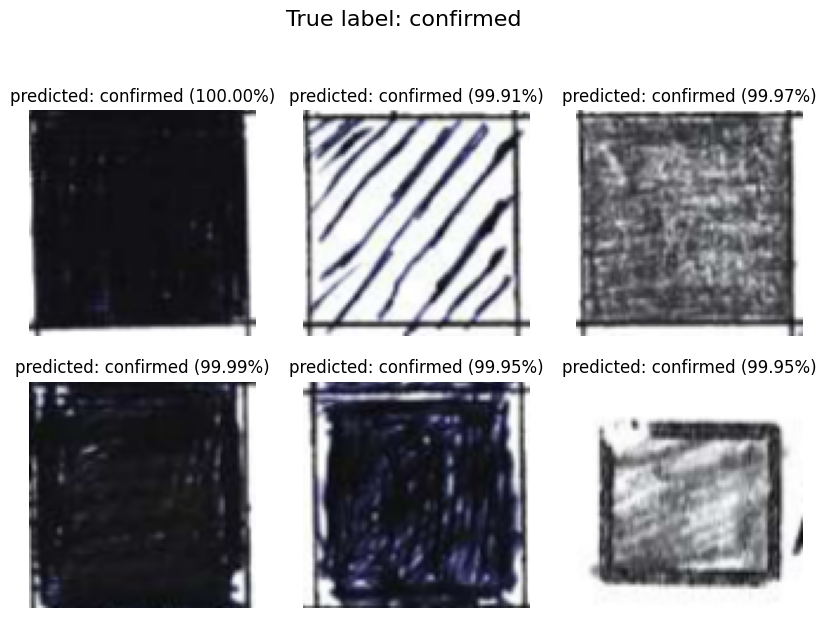

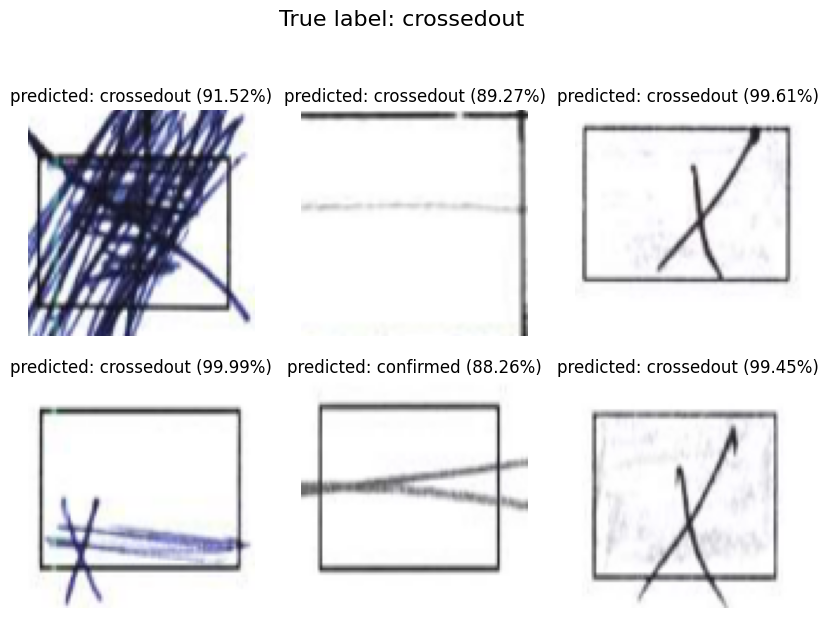

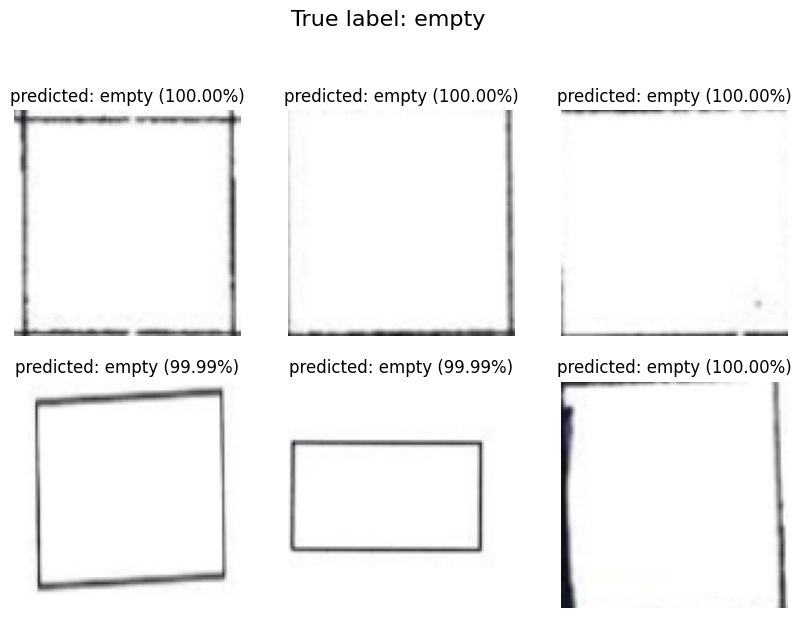

In [5]:
for true_label in class_names:
    image_batch = images[true_label]
    prediction_batch = predictions[true_label]
    label_batch = np.argmax(prediction_batch, axis=1)
    probability_batch = np.max(prediction_batch, axis=1)

    plt.figure(figsize=(10, 10))
    plt.suptitle("True label: " + true_label, fontsize=16)
    for i in range(len(image_batch)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].astype("uint8"))
        label = label_batch[i]
        ax.set_title(f"predicted: {class_names[label]} ({(probability_batch[i] * 100):.2f}%)")
        plt.axis("off")
    plt.show()